In [1]:
import pandas as pd

file_path = "train.csv"
train = pd.read_csv(file_path)
train.head()



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:

# datetime 컬럼을 datetime 타입으로 변환
train['datetime'] = pd.to_datetime(train['datetime'])

# 연, 월, 일, 시, 분, 초 컬럼 추가
# .dt.year, .dt.month, .dt.day, .dt.hour, .dt.minute, .dt.second
# 이것의 기능은 datetime 타입에서 년, 월, 일, 시, 분, 초를 추출해서 새로운 컬럼을 만들어주는 것
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train[['datetime', 'year', 'month', 'day', 'hour', 'minute', 'second']]


,datetime,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0
...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,2012,12,19,22,0,0


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

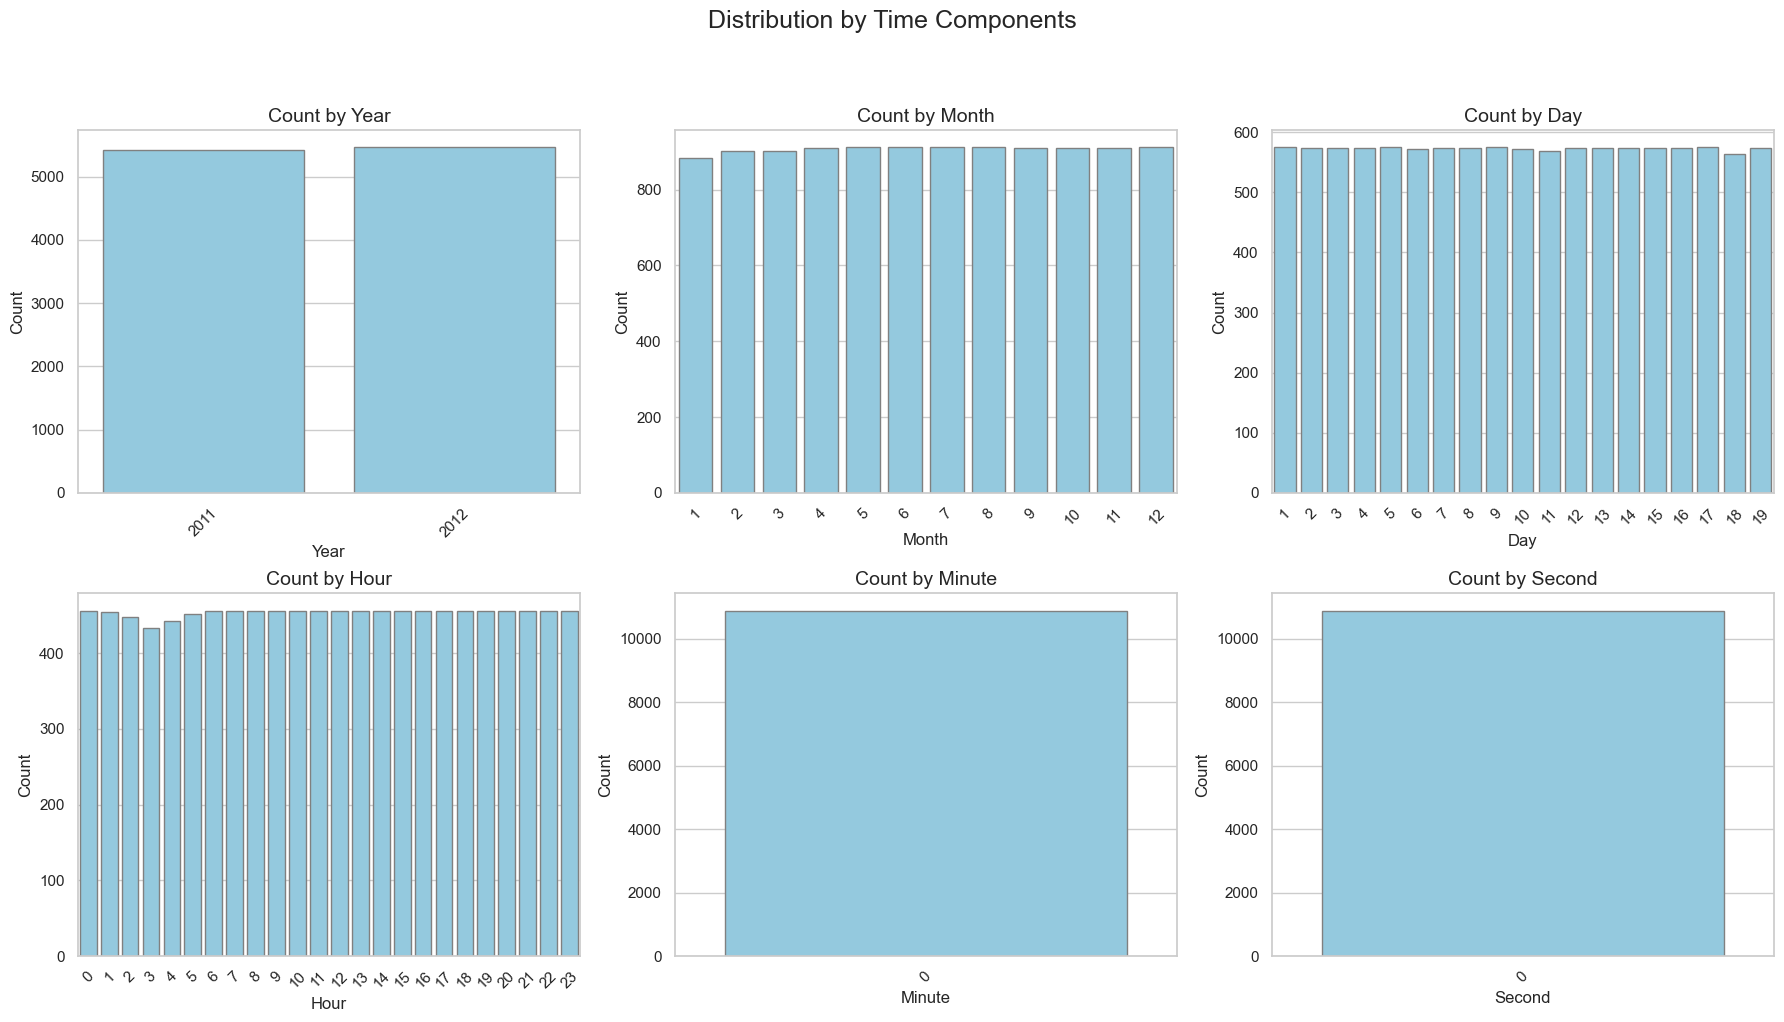

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 스타일 테마 지정
sns.set_theme(style="whitegrid")

# 컬럼 리스트
time_columns = ['year', 'month', 'day', 'hour', 'minute', 'second']

# 시각화
plt.figure(figsize=(18, 10))

for i, col in enumerate(time_columns):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=train, x=col, color='skyblue', edgecolor='gray')
    plt.title(f"Count by {col.capitalize()}", fontsize=14)
    plt.xlabel(col.capitalize(), fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.suptitle("Distribution by Time Components", fontsize=18, y=1.02)
plt.subplots_adjust(top=0.9)
plt.show()


In [13]:
# count 컬럼과 다른 모든 피처 간의 상관계수 출력
corr_with_count = train.corr()['count'].drop('count').sort_values(ascending=False)

print("Correlation with count:")
print(corr_with_count)



Correlation with count:
registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
datetime      0.310187
year          0.260403
month         0.166862
season        0.163439
windspeed     0.101369
day           0.019826
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
minute             NaN
second             NaN
Name: count, dtype: float64


In [14]:
# 상관계수 분석을 해보았을 때
# 유의미한 것들은 hour, temp, atemp, humidity 이 네가지만 넣고 해보자
# 이외의 것들은 넣지 않는다.
# 그리고 count는 예측해야하는 값이기 때문에 넣으면 안된다.
# casual, registered 는 count와 선형적인 관계가 있기 때문에 넣으면 안된다.
# casual, registered 는 count를 만들 때 사용한 데이터이기 때문에 넣으면 안된다.

# 데이터 분리
from sklearn.model_selection import train_test_split

# feature, target 분리
X = train[['hour', 'temp', 'atemp', 'humidity']]
y = train['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(8708, 4) (2178, 4) (8708,) (2178,)


In [15]:
from sklearn.linear_model import LinearRegression

# 모델 정의
model = LinearRegression()

# 학습
model.fit(X_train, y_train)


LinearRegression()

In [20]:
print("가중치 (W):", model.coef_)
print("편향 (b):", model.intercept_)


가중치 (W): [ 7.69357947  2.31548447  5.06230993 -2.04169738]
편향 (b): 62.060829027496766


In [17]:


from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")


MSE: 22176.28
RMSE: 148.92


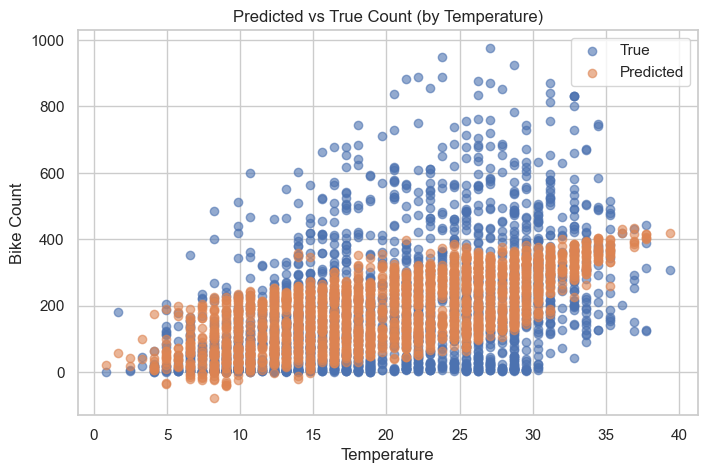

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(X_test['temp'], y_test, label='True', alpha=0.6)
plt.scatter(X_test['temp'], y_pred, label='Predicted', alpha=0.6)
plt.xlabel("Temperature")
plt.ylabel("Bike Count")
plt.title("Predicted vs True Count (by Temperature)")
plt.legend()
plt.grid(True)
plt.show()


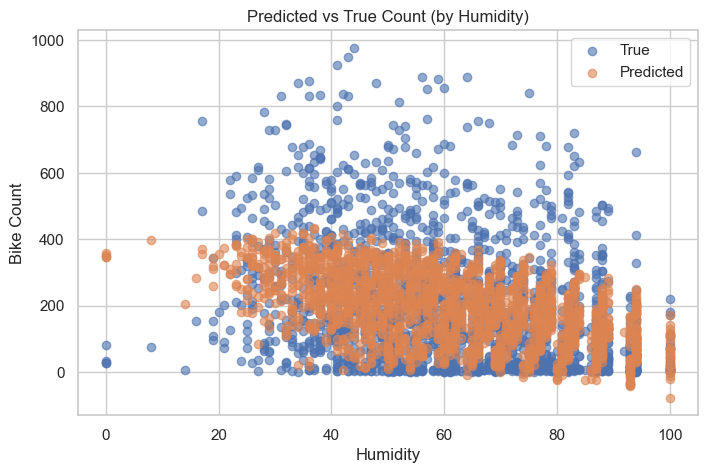

In [19]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test['humidity'], y_test, label='True', alpha=0.6)
plt.scatter(X_test['humidity'], y_pred, label='Predicted', alpha=0.6)
plt.xlabel("Humidity")
plt.ylabel("Bike Count")
plt.title("Predicted vs True Count (by Humidity)")
plt.legend()
plt.grid(True)
plt.show()
